# House sale price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("House_price_train.csv")

In [3]:
test=pd.read_csv("House_price_test.csv")

In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [5]:
train.shape

(1168, 81)

In [6]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [7]:
test.shape

(292, 80)

In [8]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
test.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
                ... 
MiscVal            8
MoSold            12
YrSold             5
SaleType           6
SaleCondition      4
Length: 80, dtype: int64

In [10]:
train.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

In [11]:
# checking the Null values in each column
null=[columns for columns in train.columns if train[columns].isnull().sum()>1]

for column in null:
    print(column,np.round(train[column].isnull().mean(),4),'% of missing values')

LotFrontage 0.1832 % of missing values
Alley 0.9341 % of missing values
MasVnrType 0.006 % of missing values
MasVnrArea 0.006 % of missing values
BsmtQual 0.0257 % of missing values
BsmtCond 0.0257 % of missing values
BsmtExposure 0.0265 % of missing values
BsmtFinType1 0.0257 % of missing values
BsmtFinType2 0.0265 % of missing values
FireplaceQu 0.4717 % of missing values
GarageType 0.0548 % of missing values
GarageYrBlt 0.0548 % of missing values
GarageFinish 0.0548 % of missing values
GarageQual 0.0548 % of missing values
GarageCond 0.0548 % of missing values
PoolQC 0.994 % of missing values
Fence 0.7971 % of missing values
MiscFeature 0.9623 % of missing values


We can see percentage of missing values in each column

We can handle them in feature engineering

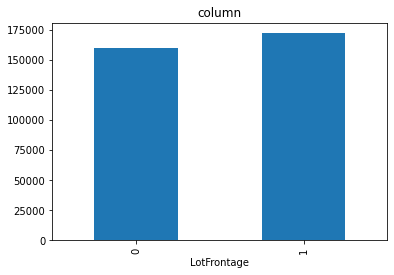

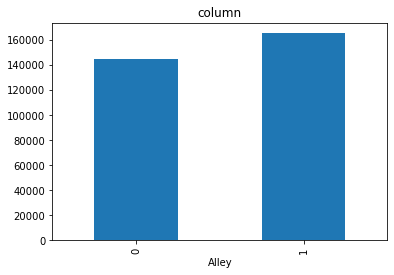

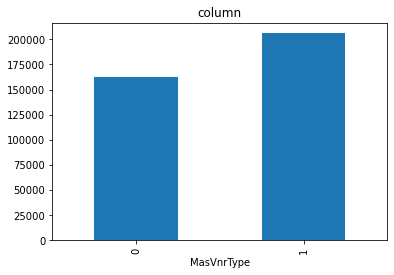

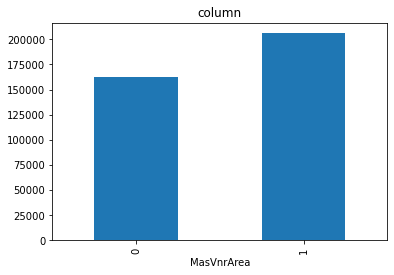

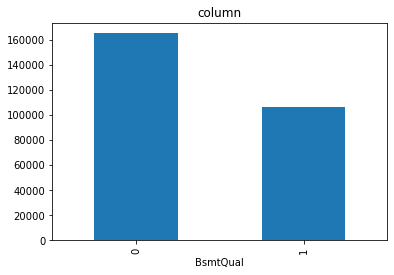

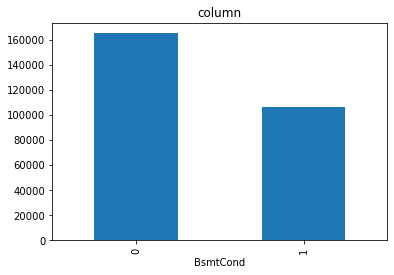

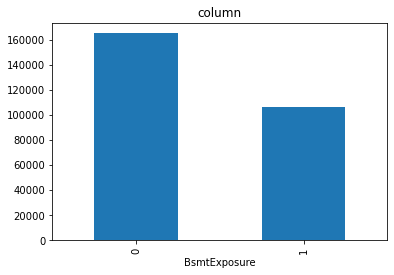

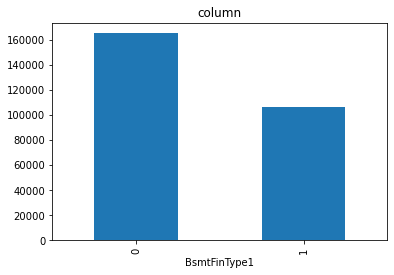

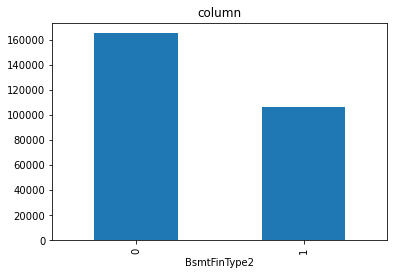

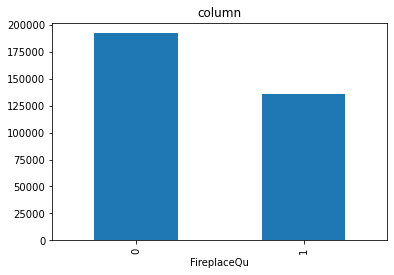

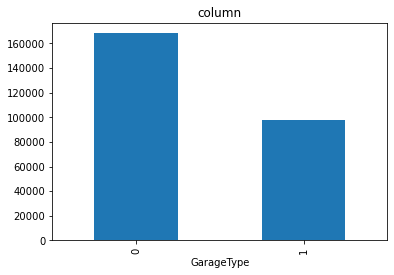

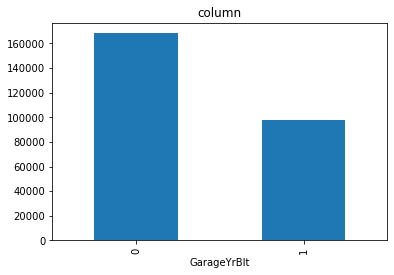

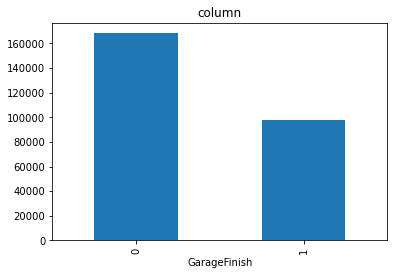

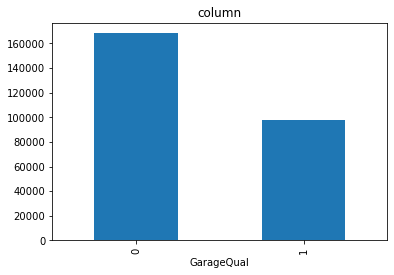

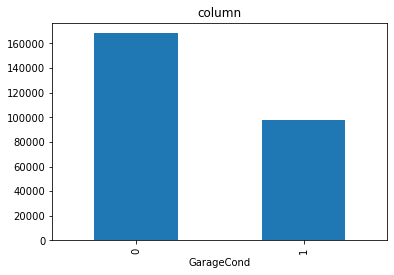

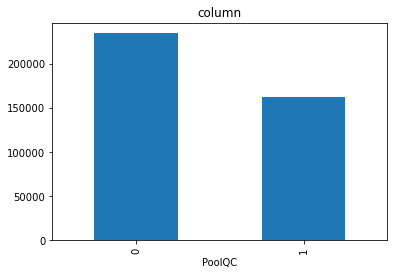

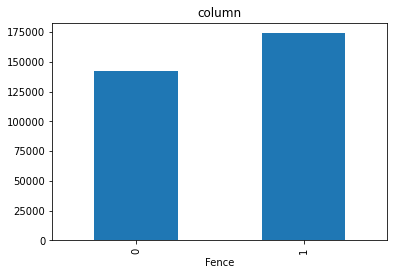

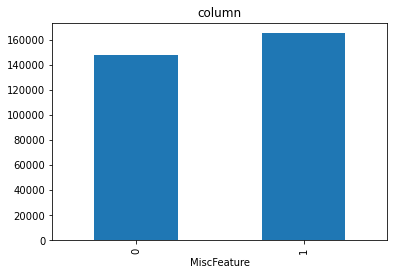

In [12]:
# We have more columns with NaN values, So we cannot drop them we need to check relation between missing values and dependent variable
# We get to know whichu column is impartant to analyse this dataset
for column in null:
    data=train.copy()
    
    # lets make the variable that indicates 1 if the observation was missing or zero
    data[column]=np.where(data[column].isnull(),1,0)
    
    # Lets calculate the mean Salesprice Where the information is missing or present
    data.groupby(column)['SalePrice'].median().plot.bar()
    plt.title('column')
    plt.show()

Here with the relation missing values and dependent variable is clearly visible,So we need to replace these null values instead of dropping them

# Numerical variables

In [13]:
# list of numerical variables
Numerical_features=[feature for feature in train.columns if train[feature].dtypes!='O']

print('Number of numerical features: ',len(Numerical_features))

train[Numerical_features].head()

Number of numerical features:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1997         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          2000       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1977.0           2         440           0          205   
1       1970.0           2         621          81          207   
2       1997.0           2         455         180          130   
3       1977.0           2         546           0          122   
4       1977.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000

We can see we have 38 numerical columns

We can see that there is 4 year features in dataset

We See some features are contineous and some are discrete

# Discrete variable

In [14]:
# descrete Features
discrete_features=[feature for feature in Numerical_features if len(train[feature].unique())<25]

print("Discrete variable count: {}".format(len(discrete_features)))

Discrete variable count: 18


We can see we have 18 descrete features

In [15]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

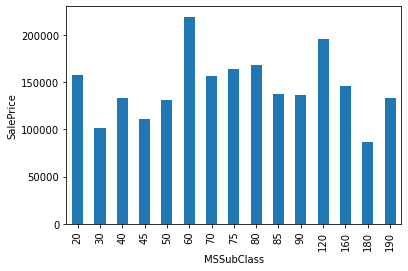

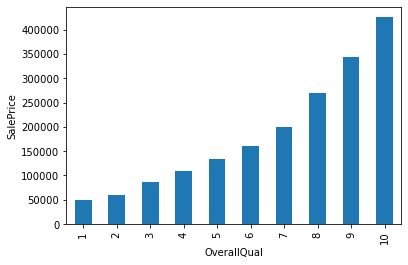

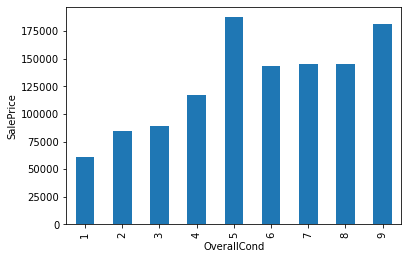

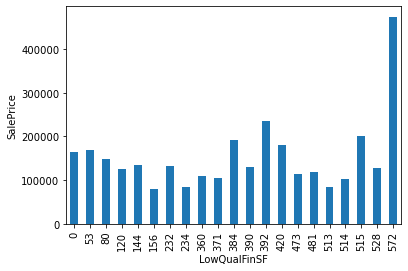

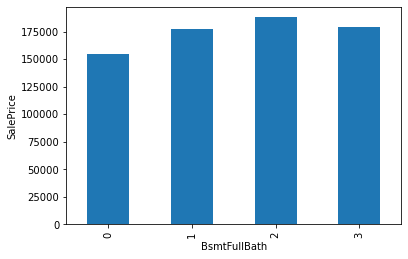

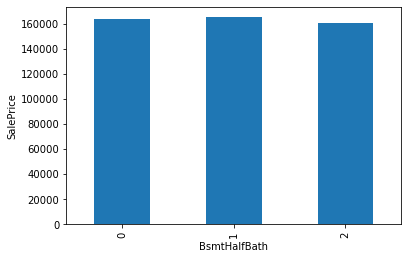

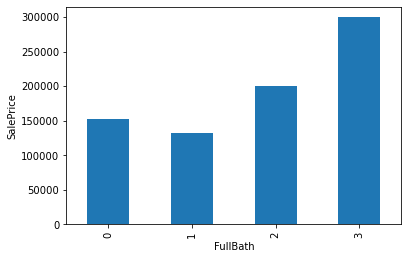

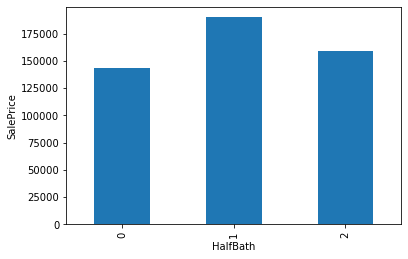

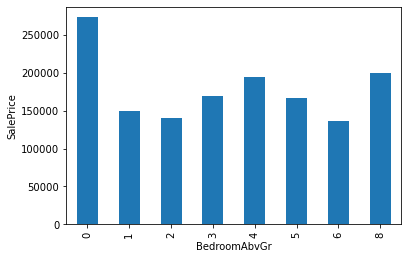

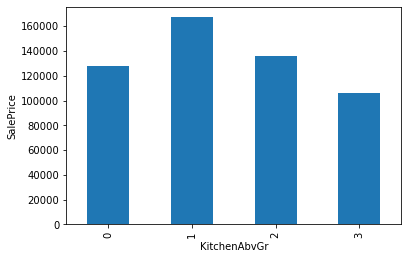

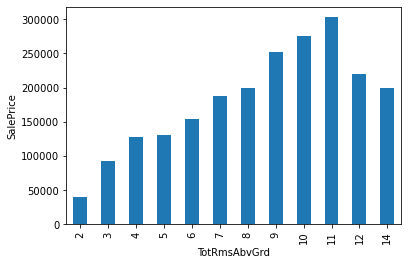

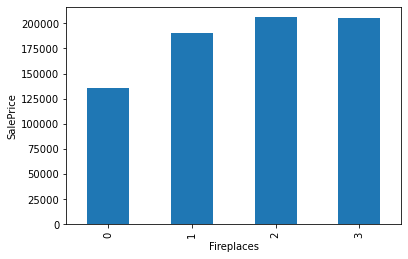

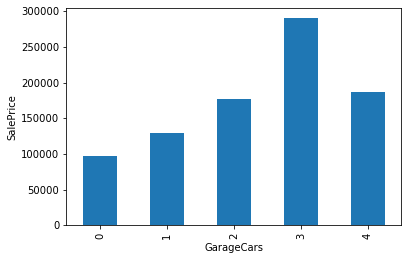

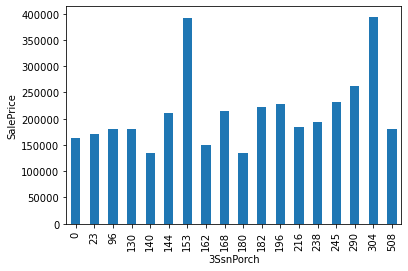

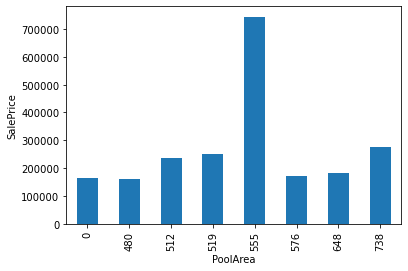

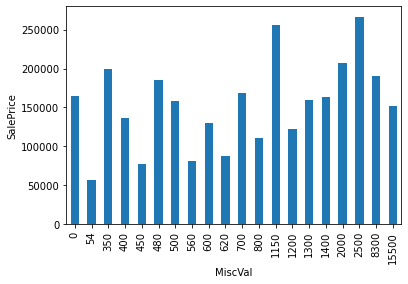

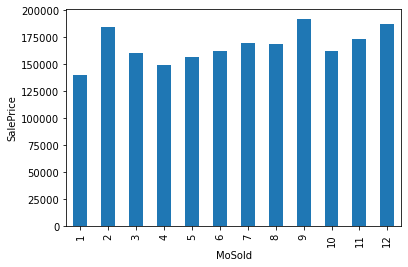

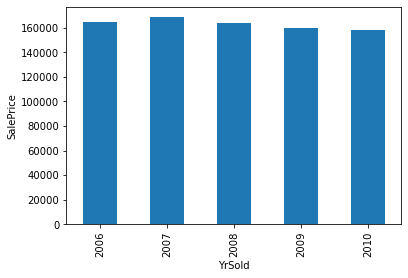

In [16]:
# Lets plot relation between discrete features and Sale price

for feature in discrete_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# Contineous variables

In [17]:
continuos_feature=[feature for feature in Numerical_features if feature not in discrete_features]
print('continuos variable count {}'.format(len(continuos_feature)))

continuos variable count 20


In [18]:
# Iwant to remove id and year features in the contineous variables
continuos_feature.remove('Id')
continuos_feature.remove('YearBuilt')
continuos_feature.remove('YearRemodAdd')
continuos_feature.remove('GarageYrBlt')

In [19]:
continuos_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

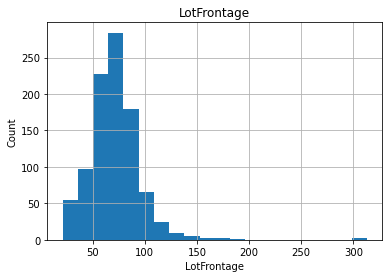

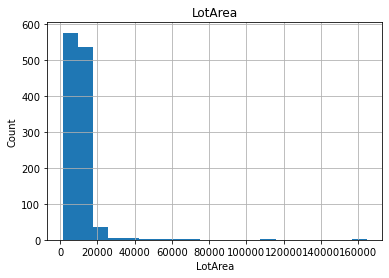

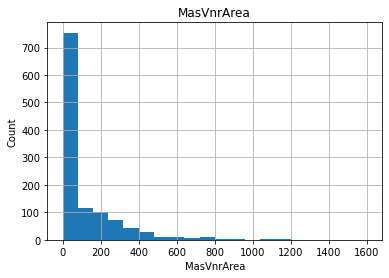

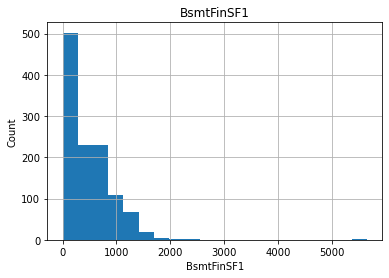

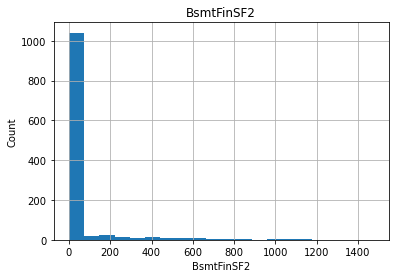

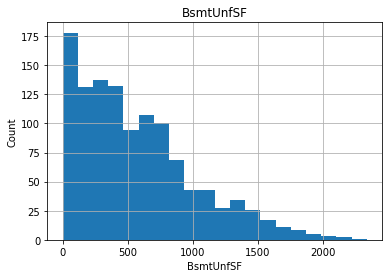

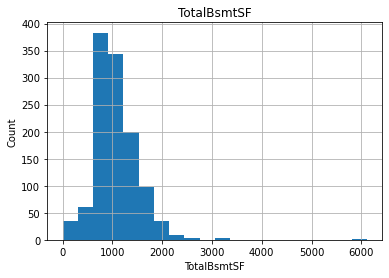

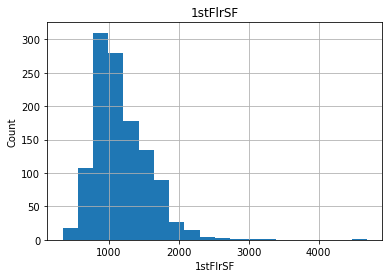

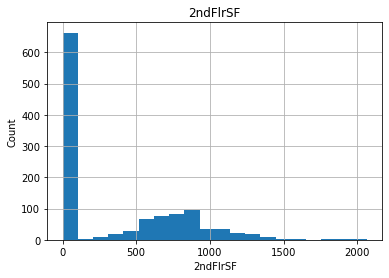

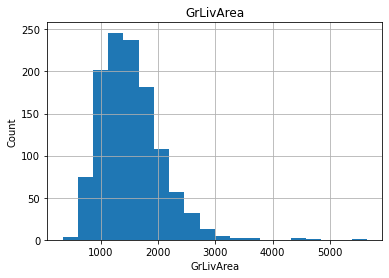

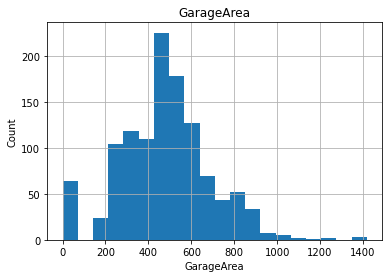

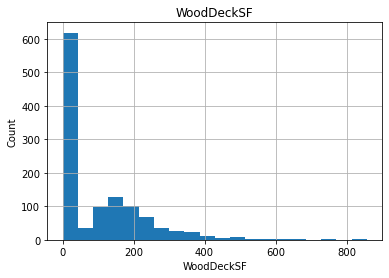

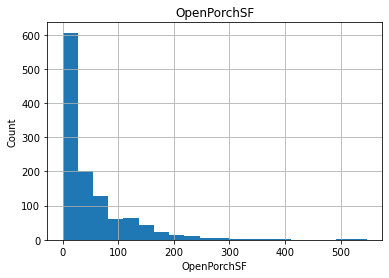

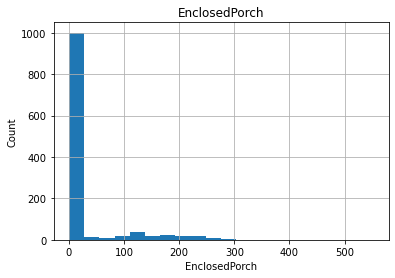

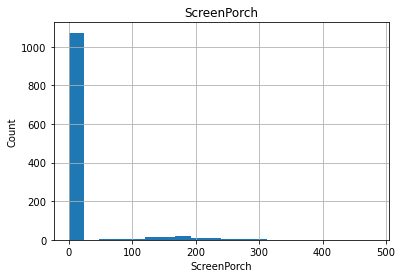

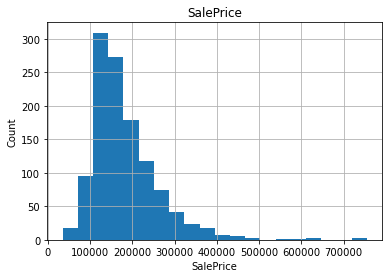

In [20]:
# lets Analyse the continous variables by plotting histograms

for feature in continuos_feature:
    data=train.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

All the contineous variables are not normally disributed except saleprice

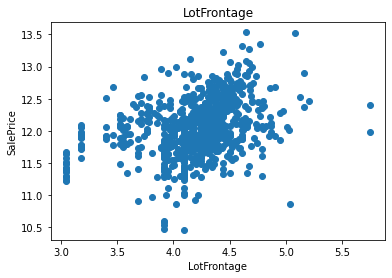

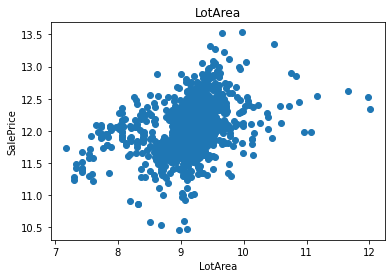

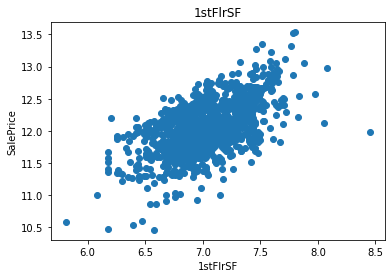

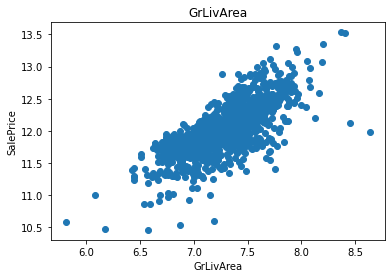

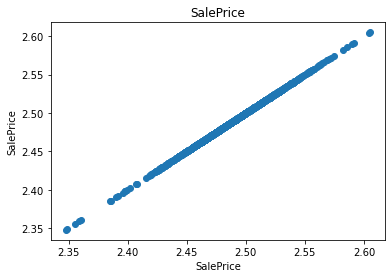

In [21]:
# We will be using logerthemic transformation for those features which are not having NaN values

for feature in continuos_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data["SalePrice"])
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

We can see contineous features are having linear relation with Sale Price

# outliers

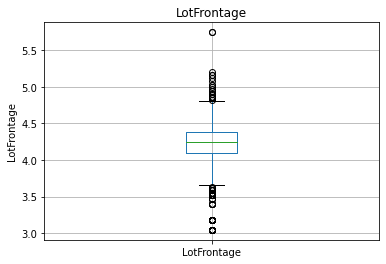

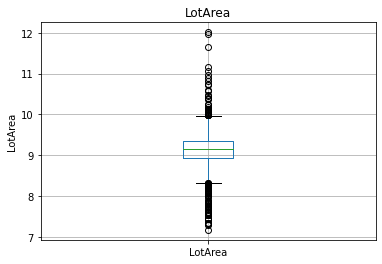

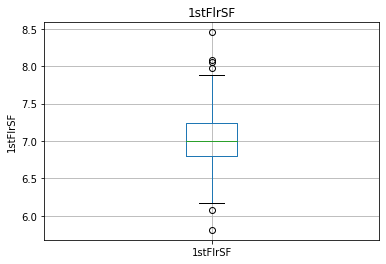

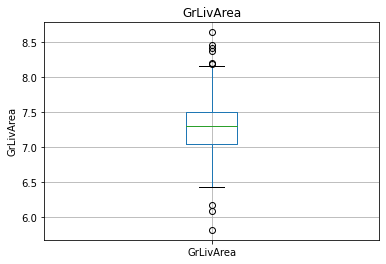

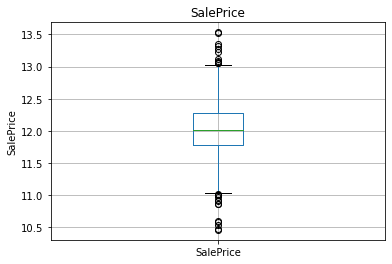

In [22]:
for feature in continuos_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

We can see some outliers in contineous variables

# Categorical features

In [23]:
categorical_features=[feature for feature in train.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [24]:
train[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      NPkVill       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story      Flat  Tar&Grv   
2      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
3       NWAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
4       NWAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     Plywood     Plywood       None        TA        TA     CBlock       Gd   
1     Wd Sdng     Wd Sdng       None        Gd        Gd      PConc       TA   
2     MetalSd     MetalSd       None        Gd        TA      PConc       Gd   
3     Plywood     Plywood    BrkFace        TA        TA     CBlock       Gd   
4     CemntBd     CmentBd      Stone        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          ALQ          Unf    GasA        TA   
1       Gd           Gd          ALQ          Rec    GasA        Ex   
2       TA           Av          GLQ          Unf    GasA        Ex   
3       TA           No          BLQ          Unf    GasA        Ex   
4       TA           No          ALQ          Unf    GasA        Gd   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ          TA     Attchd   
1          Y      SBrkr          Gd        Typ          TA     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          TA        Typ          TA     Attchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN    NaN         NaN   
1          Unf         TA         TA          Y    NaN    NaN         NaN   
2          Unf         TA         TA          Y    NaN    NaN         NaN   
3          RFn         TA         TA          Y    NaN  MnPrv         NaN   
4          Fin         TA         TA          Y    NaN    NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3      COD        Normal  
4       WD        Normal

In [25]:

for feature in categorical_features:
    print("the {} is has number of categories {}".format(feature,len(train[feature].unique())))

the MSZoning is has number of categories 5
the Street is has number of categories 2
the Alley is has number of categories 3
the LotShape is has number of categories 4
the LandContour is has number of categories 4
the Utilities is has number of categories 1
the LotConfig is has number of categories 5
the LandSlope is has number of categories 3
the Neighborhood is has number of categories 25
the Condition1 is has number of categories 9
the Condition2 is has number of categories 8
the BldgType is has number of categories 5
the HouseStyle is has number of categories 8
the RoofStyle is has number of categories 6
the RoofMatl is has number of categories 8
the Exterior1st is has number of categories 14
the Exterior2nd is has number of categories 15
the MasVnrType is has number of categories 5
the ExterQual is has number of categories 4
the ExterCond is has number of categories 5
the Foundation is has number of categories 6
the BsmtQual is has number of categories 5
the BsmtCond is has number 

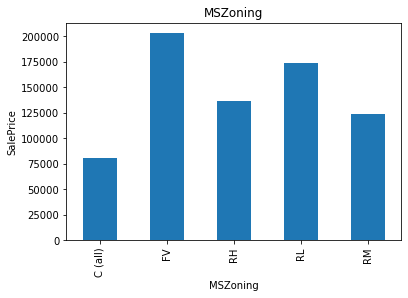

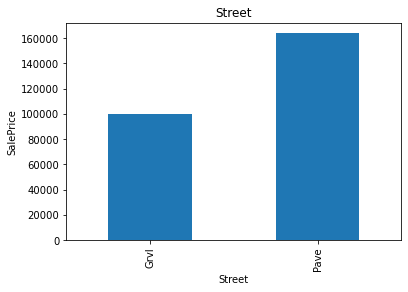

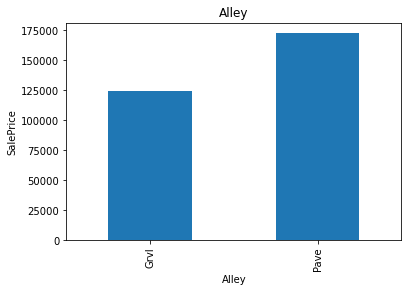

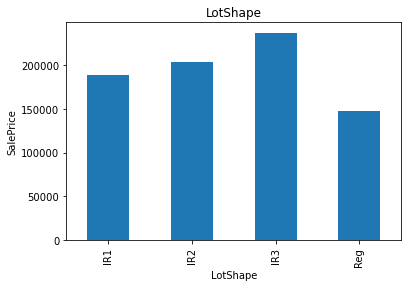

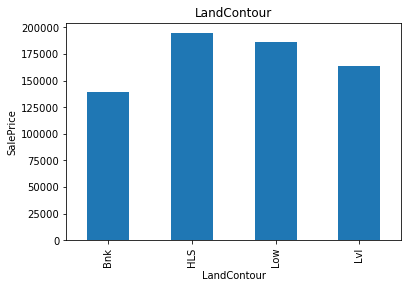

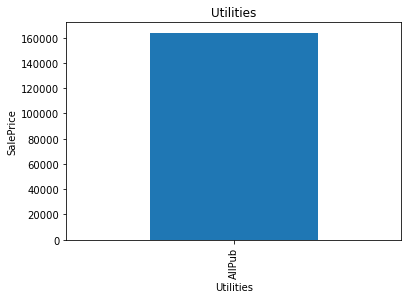

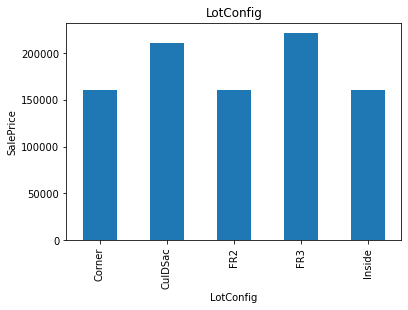

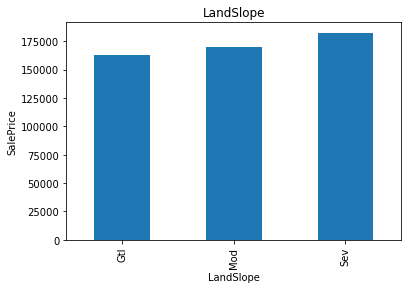

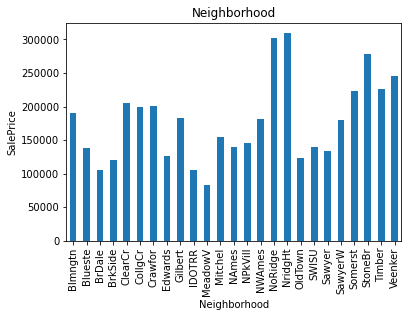

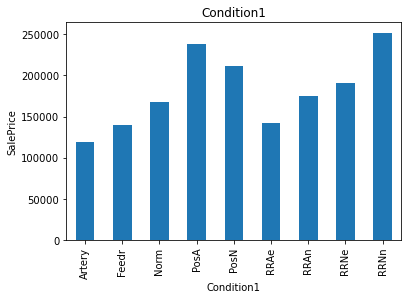

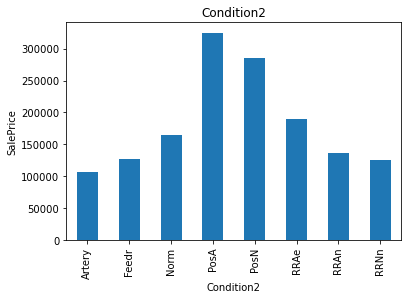

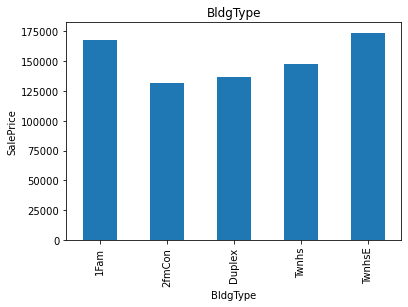

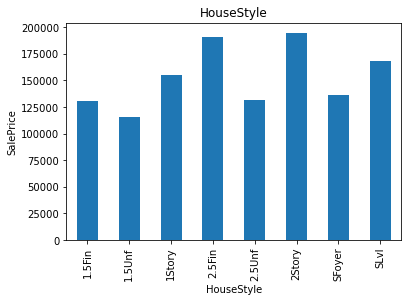

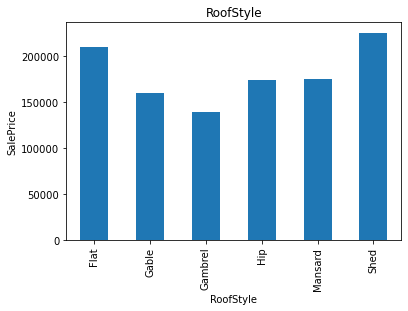

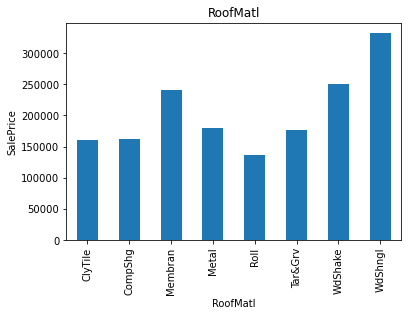

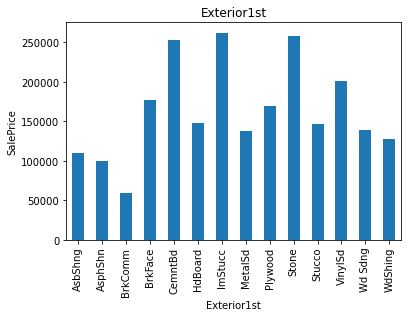

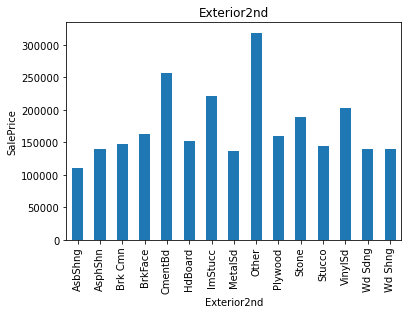

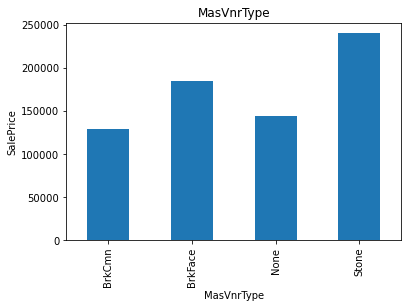

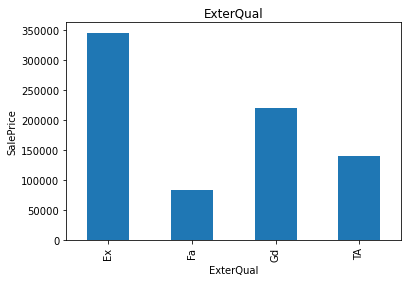

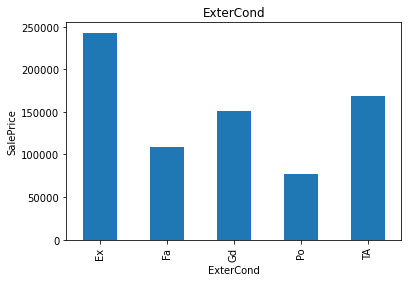

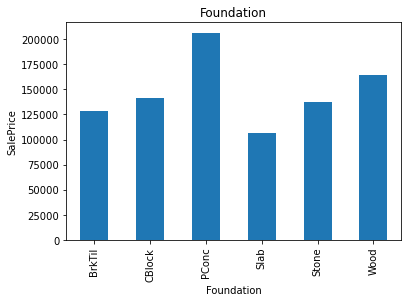

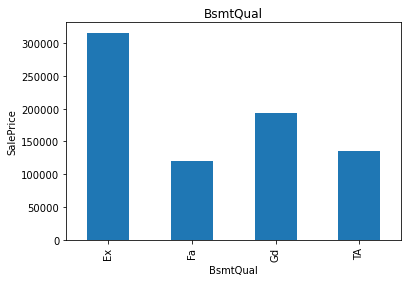

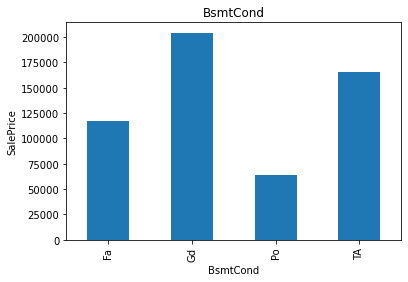

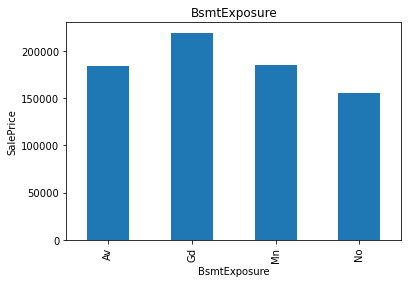

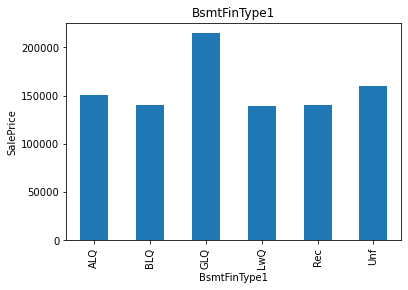

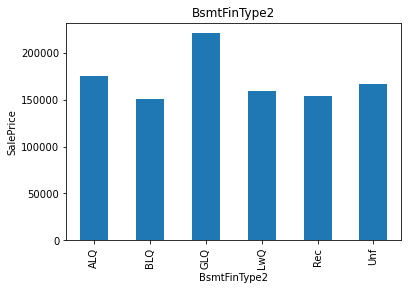

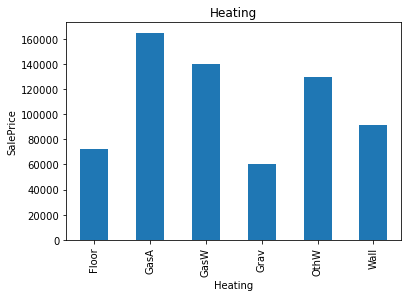

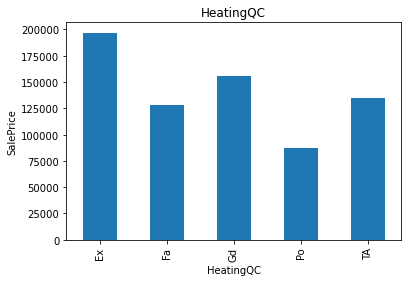

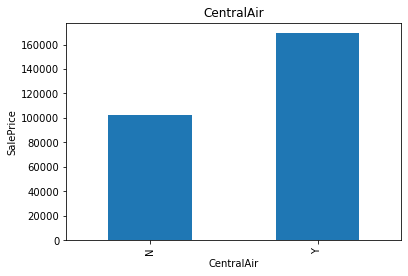

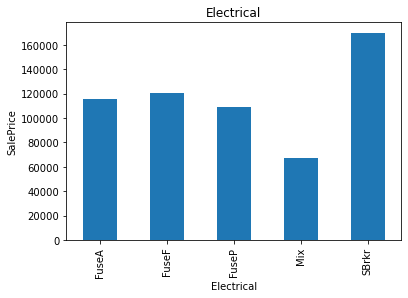

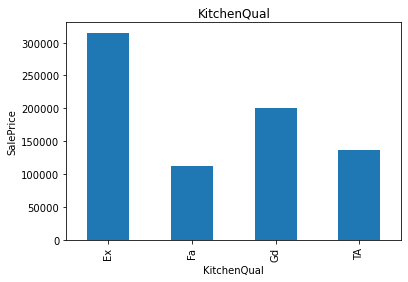

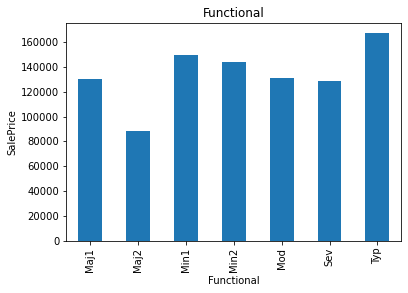

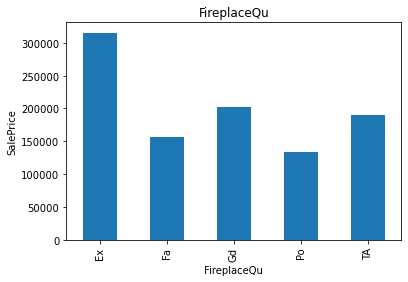

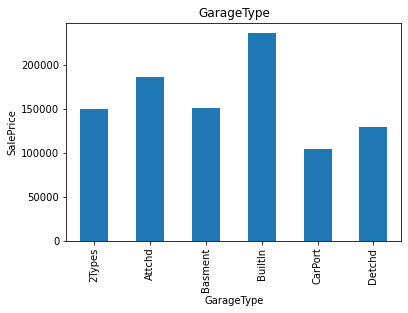

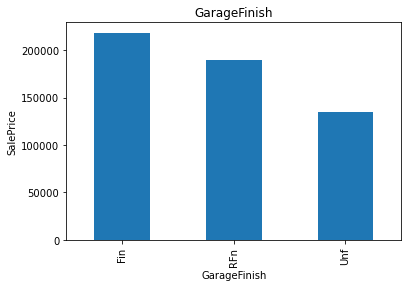

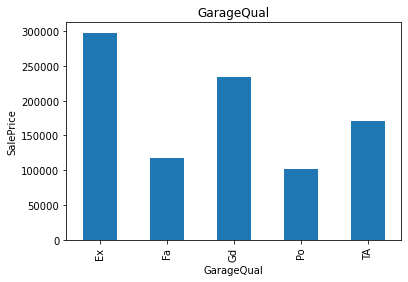

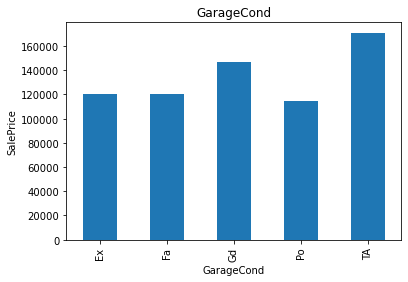

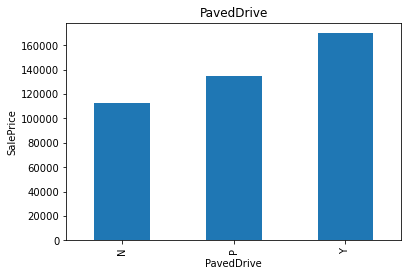

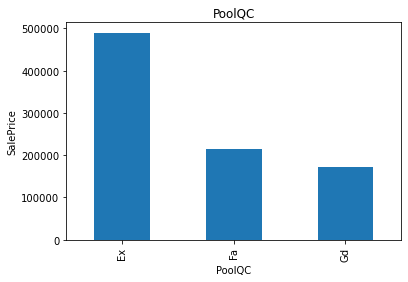

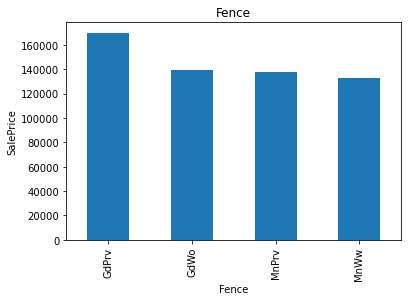

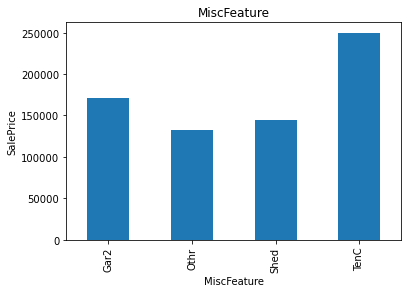

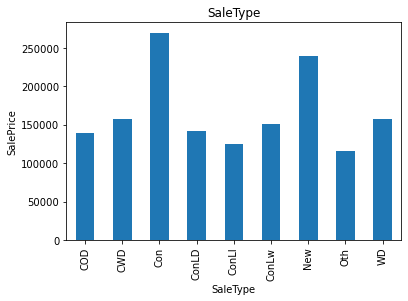

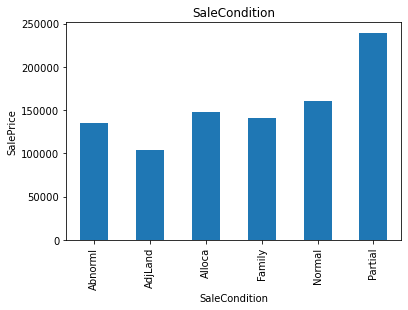

In [26]:
# Lets plot relation between categorical_features and SalePrice
for feature in categorical_features:
    data=train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

We can see all the categeries in each feature and how they ralated to SalePrice

# Feature engineering

In [27]:
# Missing values for categorical features for train data
categorical_features_null=[feature for feature in train.columns if train[feature].dtypes=='O' and train[feature].isnull().sum()>1]

for feature in  categorical_features_null:
    print("{}: {}%  missing values".format(feature,np.round(train[feature].isnull().mean(),4)))
    

Alley: 0.9341%  missing values
MasVnrType: 0.006%  missing values
BsmtQual: 0.0257%  missing values
BsmtCond: 0.0257%  missing values
BsmtExposure: 0.0265%  missing values
BsmtFinType1: 0.0257%  missing values
BsmtFinType2: 0.0265%  missing values
FireplaceQu: 0.4717%  missing values
GarageType: 0.0548%  missing values
GarageFinish: 0.0548%  missing values
GarageQual: 0.0548%  missing values
GarageCond: 0.0548%  missing values
PoolQC: 0.994%  missing values
Fence: 0.7971%  missing values
MiscFeature: 0.9623%  missing values


In [28]:
# Missing values for categorical features for test data
categorical_features_null_test=[feature for feature in test.columns if test[feature].dtypes=='O' and test[feature].isnull().sum()>1]

for feature in  categorical_features_null_test:
    print("{}: {}%  missing values".format(feature,np.round(test[feature].isnull().mean(),4)))
    

Alley: 0.9521%  missing values
BsmtQual: 0.024%  missing values
BsmtCond: 0.024%  missing values
BsmtExposure: 0.024%  missing values
BsmtFinType1: 0.024%  missing values
BsmtFinType2: 0.024%  missing values
FireplaceQu: 0.476%  missing values
GarageType: 0.0582%  missing values
GarageFinish: 0.0582%  missing values
GarageQual: 0.0582%  missing values
GarageCond: 0.0582%  missing values
Fence: 0.8493%  missing values
MiscFeature: 0.9658%  missing values


In [29]:
# Replace NaN values with diffrent label in train dataset

def replace_cat_feature(train,categorical_features_null):
    data=train.copy()
    data[categorical_features_null]=data[categorical_features_null].fillna('Missing')
    return data
    
train=replace_cat_feature(train,categorical_features_null)

train[categorical_features_null].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [30]:
# Replace NaN values with diffrent label in test dataset

def replace_cat_feature(test,categorical_features_null_test):
    data=test.copy()
    data[categorical_features_null_test]=data[categorical_features_null_test].fillna('Missing')
    return data
    
test=replace_cat_feature(test,categorical_features_null_test)

test[categorical_features_null_test].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
Fence           0
MiscFeature     0
dtype: int64

In [31]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0  127         120       RL          NaN     4928   Pave  Missing      IR1   
1  889          20       RL         95.0    15865   Pave  Missing      IR1   
2  793          60       RL         92.0     9920   Pave  Missing      IR1   
3  110          20       RL        105.0    11751   Pave  Missing      IR1   
4  422          20       RL          NaN    16635   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1 

In [32]:
# Missing values for numerical features for train data
numerical_features_null=[feature for feature in train.columns if train[feature].dtypes!='O' and train[feature].isnull().sum()>1]

for feature in  numerical_features_null:
    print("{}: {}%  missing values".format(feature,np.round(train[feature].isnull().mean(),4)))
    

LotFrontage: 0.1832%  missing values
MasVnrArea: 0.006%  missing values
GarageYrBlt: 0.0548%  missing values


In [33]:
for feature in numerical_features_null:
    median_value=train[feature].median()
    
    train[feature].fillna(median_value,inplace=True)
    
train[numerical_features_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [34]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0     127         120       RL         70.0     4928   Pave  Missing      IR1   
1     889          20       RL         95.0    15865   Pave  Missing      IR1   
2     793          60       RL         92.0     9920   Pave  Missing      IR1   
3     110          20       RL        105.0    11751   Pave  Missing      IR1   
4     422          20       RL         70.0    16635   Pave  Missing      IR1   
...   ...         ...      ...          ...      ...    ...      ...      ...   
1163  289          20       RL         70.0     9819   Pave  Missing      IR1   
1164  554          20       RL         67.0     8777   Pave  Missing      Reg   
1165  196         160       RL         24.0     2280   Pave  Missing      Reg   
1166   31          70  C (all)         50.0     8500   Pave     Pave      Reg   
1167  617          60       RL         70.0     7861   Pave  Missing      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CB

In [35]:
# Missing values for numerical features for test data
numerical_features_null_test=[feature for feature in test.columns if test[feature].dtypes!='O' and test[feature].isnull().sum()>1]

for feature in  numerical_features_null_test:
    print("{}: {}%  missing values".format(feature,np.round(test[feature].isnull().mean(),4)))
    

LotFrontage: 0.1541%  missing values
GarageYrBlt: 0.0582%  missing values
PoolQC: 1.0%  missing values


In [36]:
for feature in numerical_features_null_test:
    median_value=test[feature].median()
    
    test[feature].fillna(median_value,inplace=True)
    
test[numerical_features_null_test].isnull().sum()

LotFrontage      0
GarageYrBlt      0
PoolQC         292
dtype: int64

From above observation we can say that PoolQC is fully null column so i want to replace with Missing

In [37]:
test["PoolQC"].fillna("Missing",inplace=True)

In [38]:
test[numerical_features_null_test].isnull().sum()

LotFrontage    0
GarageYrBlt    0
PoolQC         0
dtype: int64

In [39]:
# Temporial variables(date and time variable)
# replacing year with number of years

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    
    train[feature]=train['YrSold']-train[feature]


In [40]:
train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0         31            31         30.0
1         37            37         37.0
2         11            10         10.0
3         33            33         33.0
4         32             9         32.0

In [41]:
# Temporial variables(date and time variable) test dataset
# replacing year with number of years

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    
    test[feature]=test['YrSold']-test[feature]


In [42]:
test[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          2             1          2.0
1         25            25         25.0
2          8             8          8.0
3         68            59         68.0
4          1             1          1.0

In [43]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0     127         120       RL         70.0     4928   Pave  Missing      IR1   
1     889          20       RL         95.0    15865   Pave  Missing      IR1   
2     793          60       RL         92.0     9920   Pave  Missing      IR1   
3     110          20       RL        105.0    11751   Pave  Missing      IR1   
4     422          20       RL         70.0    16635   Pave  Missing      IR1   
...   ...         ...      ...          ...      ...    ...      ...      ...   
1163  289          20       RL         70.0     9819   Pave  Missing      IR1   
1164  554          20       RL         67.0     8777   Pave  Missing      Reg   
1165  196         160       RL         24.0     2280   Pave  Missing      Reg   
1166   31          70  C (all)         50.0     8500   Pave     Pave      Reg   
1167  617          60       RL         70.0     7861   Pave  Missing      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5         31   
1          Norm     1Fam     1Story            8            6         37   
2          Norm     1Fam     2Story            7            5         11   
3          Norm     1Fam     1Story            6            6         33   
4          Norm     1Fam     1Story            6            7         32   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5         43   
1164       Norm     1Fam     1Story            4            5         60   
1165       Norm    Twnhs     2Story            6            6         33   
1166       Norm     1Fam     2Story            4            4         88   
1167       Norm     1Fam     2Story            6            5          4   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0               31     Gable  CompShg     Plywood     Plywood       None   
1               37      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2               10     Gable  CompShg     MetalSd     MetalSd       None   
3               33       Hip  CompShg     Plywood     Plywood    BrkFace   
4                9     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163            43     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164             6     Gable  CompShg     VinylSd     VinylSd       None   
1165            33     Gable  CompShg     Plywood     Brk Cmn       None   
1166            58   Gambrel  CompShg     BrkFace     BrkFace       None   
1167             3     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CB

In [44]:
# train
# log transformation of numerical varibles without Zeros in it.
Num_features=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for feature in Num_features:
    train[feature]=np.log(train[feature])

In [45]:
# test
# log transformation of numerical varibles without Zeros in it.
Num_features_test=['LotFrontage','LotArea','1stFlrSF','GrLivArea']

for feature in Num_features_test:
    test[feature]=np.log(test[feature])

# Handling Rare Categorical features

In [46]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [47]:
# Train
for feature in categorical_features:
    temp=train.groupby(feature)['SalePrice'].count()/len(train)
    temp_df=temp[temp>0.01].index
    train[feature]=np.where(train[feature].isin(temp_df),train[feature],'Rar_var')

In [48]:
train

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley  \
0     127         120       RL     4.248495  8.502689   Pave  Missing   
1     889          20       RL     4.553877  9.671871   Pave  Missing   
2     793          60       RL     4.521789  9.202308   Pave  Missing   
3     110          20       RL     4.653960  9.371694   Pave  Missing   
4     422          20       RL     4.248495  9.719264   Pave  Missing   
...   ...         ...      ...          ...       ...    ...      ...   
1163  289          20       RL     4.248495  9.192075   Pave  Missing   
1164  554          20       RL     4.204693  9.079890   Pave  Missing   
1165  196         160       RL     3.178054  7.731931   Pave  Missing   
1166   31          70  Rar_var     3.912023  9.047821   Pave     Pave   
1167  617          60       RL     4.248495  8.969669   Pave  Missing   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         IR1         Lvl    AllPub    Inside       Gtl      Rar_var   
1         IR1         Lvl    AllPub    Inside       Mod        NAmes   
2         IR1         Lvl    AllPub   CulDSac       Gtl      NoRidge   
3         IR1         Lvl    AllPub    Inside       Gtl       NWAmes   
4         IR1         Lvl    AllPub       FR2       Gtl       NWAmes   
...       ...         ...       ...       ...       ...          ...   
1163      IR1         Lvl    AllPub    Inside       Gtl       Sawyer   
1164      Reg         Lvl    AllPub    Inside       Gtl      Edwards   
1165      Reg         Lvl    AllPub       FR2       Gtl      Rar_var   
1166      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   
1167      IR1         Lvl    AllPub    Inside       Gtl      Gilbert   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm   TwnhsE     1Story            6            5   
1          Norm       Norm     1Fam     1Story            8            6   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     1Story            6            6   
4          Norm       Norm     1Fam     1Story            6            7   
...         ...        ...      ...        ...          ...          ...   
1163       Norm       Norm     1Fam     1Story            5            5   
1164      Feedr       Norm     1Fam     1Story            4            5   
1165       Norm       Norm    Twnhs     2Story            6            6   
1166      Feedr       Norm     1Fam     2Story            4            4   
1167       Norm       Norm     1Fam     2Story            6            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            31            31     Gable  CompShg     Plywood     Plywood   
1            37            37      Flat  Rar_var     Wd Sdng     Wd Sdng   
2            11            10     Gable  CompShg     MetalSd     MetalSd   
3            33            33       Hip  CompShg     Plywood     Plywood   
4            32             9     Gable  CompShg     CemntBd     CmentBd   
...         ...           ...       ...      ...         ...         ...   
1163         43            43     Gable  CompShg     MetalSd     MetalSd   
1164         60             6     Gable  CompShg     VinylSd     VinylSd   
1165         33            33     Gable  CompShg     Plywood     Rar_var   
1166         88            58   Rar_var  CompShg     BrkFace     BrkFace   
1167          4             3     Gable  CompShg     VinylSd     VinylSd   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          None         0.0        TA        TA     CBlock       Gd       TA   
1          None         0.0        Gd        Gd      PConc       TA       Gd   
2          None         0.0        Gd        TA      PConc       Gd       TA   
3       BrkFace       480.0        TA        TA     CBlock       Gd       TA   
4         Stone       126.0        Gd  

In [49]:
# Converting all categorical features
for feature in categorical_features:
    labels_ordered=train.groupby([feature])['LotFrontage'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)


In [50]:
train

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0     127         120         4     4.248495  8.502689       0      2   
1     889          20         4     4.553877  9.671871       0      2   
2     793          60         4     4.521789  9.202308       0      2   
3     110          20         4     4.653960  9.371694       0      2   
4     422          20         4     4.248495  9.719264       0      2   
...   ...         ...       ...          ...       ...     ...    ...   
1163  289          20         4     4.248495  9.192075       0      2   
1164  554          20         4     4.204693  9.079890       0      2   
1165  196         160         4     3.178054  7.731931       0      2   
1166   31          70         3     3.912023  9.047821       0      0   
1167  617          60         4     4.248495  8.969669       0      2   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0            2            0          0          2          0             0   
1            2            0          0          2          2            15   
2            2            0          0          1          0            20   
3            2            0          0          2          0            17   
4            2            0          0          0          0            17   
...        ...          ...        ...        ...        ...           ...   
1163         2            0          0          2          0            13   
1164         0            0          0          2          0             8   
1165         0            0          0          0          0             0   
1166         0            0          0          2          0             6   
1167         2            0          0          2          0            16   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0              1           0         1           5            6            5   
1              1           0         4           5            8            6   
2              1           0         4           4            7            5   
3              1           0         4           5            6            6   
4              1           0         4           5            6            7   
...          ...         ...       ...         ...          ...          ...   
1163           1           0         4           5            5            5   
1164           4           0         4           5            4            5   
1165           1           0         0           4            6            6   
1166           4           0         4           4            4            4   
1167           1           0         4           4            6            5   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0            31            31          0         0            6           10   
1            37            37          3         1            7            8   
2            11            10          0         0            1            3   
3            33            33          2         0            6           10   
4            32             9          0         0            0            0   
...         ...           ...        ...       ...          ...          ...   
1163         43            43          0         0            1            3   
1164         60             6          0         0            9            9   
1165         33            33          0         0            6            1   
1166         88            58          1         0            4            5   
1167          4             3          0         0            9            9   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0              0         0.0          1          3           2         2   
1              0         0.0          2          2           3         3   
2              0         0.0          2    

In [51]:
categorical_features_null=[feature for feature in test.columns if data[feature].dtypes=='O']
categorical_features_null

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [52]:
# Converting all categorical features
for feature in categorical_features_null:
    labels_ordered=test.groupby([feature])['LotFrontage'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test[feature]=test[feature].map(labels_ordered)


In [53]:
test

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0     337          20         3     4.454347  9.557964       0      2   
1    1018         120         3     4.174387  8.668024       0      2   
2     929          20         3     4.174387  9.379070       0      2   
3    1148          70         3     4.317488  9.392662       0      2   
4    1227          60         3     4.454347  9.588640       0      2   
..    ...         ...       ...          ...       ...     ...    ...   
287    83          20         3     4.356709  9.230731       0      2   
288  1048          20         3     4.043051  9.131838       0      2   
289    17          20         3     4.174387  9.327323       0      2   
290   523          50         0     3.912023  8.517193       0      2   
291  1379         160         0     3.044522  7.577122       0      2   

     LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0           3            2          0          4          0            14   
1           3            0          0          1          0            14   
2           1            0          0          3          0            11   
3           1            1          0          3          0            10   
4           3            0          0          1          0            12   
..        ...          ...        ...        ...        ...           ...   
287         1            0          0          3          0            12   
288         0            0          0          3          0            11   
289         3            0          0          1          0            16   
290         1            0          0          4          0             5   
291         1            0          0          3          0             0   

     Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0             0           1         3           6            9            5   
1             0           1         1           6            8            5   
2             0           1         3           6            8            5   
3             0           1         3           2            7            7   
4             2           1         3           2            6            5   
..          ...         ...       ...         ...          ...          ...   
287           0           1         3           6            8            5   
288           0           1         3           6            5            5   
289           0           1         3           6            6            7   
290           2           1         3           4            6            7   
291           0           1         0           2            6            5   

     YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0            2             1          2         0            8            9   
1           25            25          0         0            3            5   
2            8             8          2         0            8            9   
3           68            59          0         0            4            7   
4            1             1          0         0            8            9   
..         ...           ...        ...       ...          ...          ...   
287          1             1          0         0            8            9   
288         14            13          0         0            8            9   
289         40            40          0         0            7            8   
290         59            56          0         0            0            1   
291         33            33          0         0            3            5   

     MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0           3.0       200.0          1          2           3         4   
1           0.0         0.0          1          2           2         2   
2           0.0         0.0          1          2           3         2   
3      

In [54]:
#train
# dropping unwanted columns
train=train.drop('Id',axis=1)

#test
test=test.drop('Id',axis=1)

In [55]:
train

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0            120         4     4.248495  8.502689       0      2         2   
1             20         4     4.553877  9.671871       0      2         2   
2             60         4     4.521789  9.202308       0      2         2   
3             20         4     4.653960  9.371694       0      2         2   
4             20         4     4.248495  9.719264       0      2         2   
...          ...       ...          ...       ...     ...    ...       ...   
1163          20         4     4.248495  9.192075       0      2         2   
1164          20         4     4.204693  9.079890       0      2         0   
1165         160         4     3.178054  7.731931       0      2         0   
1166          70         3     3.912023  9.047821       0      0         0   
1167          60         4     4.248495  8.969669       0      2         2   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               0          0          2          0             0           1   
1               0          0          2          2            15           1   
2               0          0          1          0            20           1   
3               0          0          2          0            17           1   
4               0          0          0          0            17           1   
...           ...        ...        ...        ...           ...         ...   
1163            0          0          2          0            13           1   
1164            0          0          2          0             8           4   
1165            0          0          0          0             0           1   
1166            0          0          2          0             6           4   
1167            0          0          2          0            16           1   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              0         1           5            6            5         31   
1              0         4           5            8            6         37   
2              0         4           4            7            5         11   
3              0         4           5            6            6         33   
4              0         4           5            6            7         32   
...          ...       ...         ...          ...          ...        ...   
1163           0         4           5            5            5         43   
1164           0         4           5            4            5         60   
1165           0         0           4            6            6         33   
1166           0         4           4            4            4         88   
1167           0         4           4            6            5          4   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0               31          0         0            6           10           0   
1               37          3         1            7            8           0   
2               10          0         0            1            3           0   
3               33          2         0            6           10           1   
4                9          0         0            0            0           3   
...            ...        ...       ...          ...          ...         ...   
1163            43          0         0            1            3           1   
1164             6          0         0            9            9           0   
1165            33          0         0            6            1           0   
1166            58          1         0            4            5           0   
1167             3          0         0            9            9           0   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0            0.0          1          3           2         2         3   
1            0.0          2          2

In [56]:
test

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0            20         3     4.454347  9.557964       0      2         3   
1           120         3     4.174387  8.668024       0      2         3   
2            20         3     4.174387  9.379070       0      2         1   
3            70         3     4.317488  9.392662       0      2         1   
4            60         3     4.454347  9.588640       0      2         3   
..          ...       ...          ...       ...     ...    ...       ...   
287          20         3     4.356709  9.230731       0      2         1   
288          20         3     4.043051  9.131838       0      2         0   
289          20         3     4.174387  9.327323       0      2         3   
290          50         0     3.912023  8.517193       0      2         1   
291         160         0     3.044522  7.577122       0      2         1   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0              2          0          4          0            14           0   
1              0          0          1          0            14           0   
2              0          0          3          0            11           0   
3              1          0          3          0            10           0   
4              0          0          1          0            12           2   
..           ...        ...        ...        ...           ...         ...   
287            0          0          3          0            12           0   
288            0          0          3          0            11           0   
289            0          0          1          0            16           0   
290            0          0          4          0             5           2   
291            0          0          3          0             0           0   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0             1         3           6            9            5          2   
1             1         1           6            8            5         25   
2             1         3           6            8            5          8   
3             1         3           2            7            7         68   
4             1         3           2            6            5          1   
..          ...       ...         ...          ...          ...        ...   
287           1         3           6            8            5          1   
288           1         3           6            5            5         14   
289           1         3           6            6            7         40   
290           1         3           4            6            7         59   
291           1         0           2            6            5         33   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0               1          2         0            8            9         3.0   
1              25          0         0            3            5         0.0   
2               8          2         0            8            9         0.0   
3              59          0         0            4            7         0.0   
4               1          0         0            8            9         3.0   
..            ...        ...       ...          ...          ...         ...   
287             1          0         0            8            9         3.0   
288            13          0         0            8            9         0.0   
289            40          0         0            7            8         1.0   
290            56          0         0            0            1         0.0   
291            33          0         0            3            5         1.0   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         200.0          1          2           3         4         2   
1           0.0          1          2           2         2         2   
2           0.

In [57]:
#Train
# Scaling
feature_scale=[feature for feature in train.columns if feature not in "SalePrice"]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train[feature_scale])

MinMaxScaler()

In [58]:
# Test
scaler=MinMaxScaler()
scaler.fit(test)

MinMaxScaler()

# feature selection

In [59]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [60]:
X_train=train.drop('SalePrice',axis=1)

In [61]:
X_train

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0            120         4     4.248495  8.502689       0      2         2   
1             20         4     4.553877  9.671871       0      2         2   
2             60         4     4.521789  9.202308       0      2         2   
3             20         4     4.653960  9.371694       0      2         2   
4             20         4     4.248495  9.719264       0      2         2   
...          ...       ...          ...       ...     ...    ...       ...   
1163          20         4     4.248495  9.192075       0      2         2   
1164          20         4     4.204693  9.079890       0      2         0   
1165         160         4     3.178054  7.731931       0      2         0   
1166          70         3     3.912023  9.047821       0      0         0   
1167          60         4     4.248495  8.969669       0      2         2   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               0          0          2          0             0           1   
1               0          0          2          2            15           1   
2               0          0          1          0            20           1   
3               0          0          2          0            17           1   
4               0          0          0          0            17           1   
...           ...        ...        ...        ...           ...         ...   
1163            0          0          2          0            13           1   
1164            0          0          2          0             8           4   
1165            0          0          0          0             0           1   
1166            0          0          2          0             6           4   
1167            0          0          2          0            16           1   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              0         1           5            6            5         31   
1              0         4           5            8            6         37   
2              0         4           4            7            5         11   
3              0         4           5            6            6         33   
4              0         4           5            6            7         32   
...          ...       ...         ...          ...          ...        ...   
1163           0         4           5            5            5         43   
1164           0         4           5            4            5         60   
1165           0         0           4            6            6         33   
1166           0         4           4            4            4         88   
1167           0         4           4            6            5          4   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0               31          0         0            6           10           0   
1               37          3         1            7            8           0   
2               10          0         0            1            3           0   
3               33          2         0            6           10           1   
4                9          0         0            0            0           3   
...            ...        ...       ...          ...          ...         ...   
1163            43          0         0            1            3           1   
1164             6          0         0            9            9           0   
1165            33          0         0            6            1           0   
1166            58          1         0            4            5           0   
1167             3          0         0            9            9           0   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0            0.0          1          3           2         2         3   
1            0.0          2          2

In [62]:
Y_train=train['SalePrice']

In [63]:
Y_train

0       11.759786
1       12.498742
2       12.505399
3       12.154779
4       12.278393
          ...    
1163    11.711776
1164    11.589887
1165    11.908340
1166    10.596635
1167    12.118334
Name: SalePrice, Length: 1168, dtype: float64

In [64]:
# Apply feature selection
#select an sutable alpha very less to get more features
#
feature_sel_model=SelectFromModel(Lasso(alpha=0.01,random_state=0))
feature_sel_model.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.01, random_state=0))

In [65]:
# selected features
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True])

In [66]:
# Lets print the Number of total and selected features

# list of selected features
selected_features=X_train.columns[(feature_sel_model.get_support())]

In [67]:
selected_features

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Neighborhood', 'Condition1',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'LowQualFinSF', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SaleCondition'],
      dtype='object')

In [68]:
X_train=X_train[selected_features]
X_train.head()

MSSubClass  MSZoning   LotArea  Neighborhood  Condition1  OverallQual  \
0         120         4  8.502689             0           1            6   
1          20         4  9.671871            15           1            8   
2          60         4  9.202308            20           1            7   
3          20         4  9.371694            17           1            6   
4          20         4  9.719264            17           1            6   

   OverallCond  YearBuilt  YearRemodAdd  Exterior1st  BsmtExposure  \
0            5         31            31            6             1   
1            6         37            37            7             4   
2            5         11            10            1             2   
3            6         33            33            6             1   
4            7         32             9            0             1   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  \
0         120           0        958         1078          2         0   
1         351         823       1043         2217          4         0   
2         862           0        255         1117          4       886   
3         705           0       1139         1844          4         0   
4        1246           0        356         1602          3         0   

   LowQualFinSF  KitchenQual  TotRmsAbvGrd  FireplaceQu  GarageYrBlt  \
0             0            0             5            4         30.0   
1             0            2             8            4         37.0   
2             0            0             8            4         10.0   
3             0            0             7            4         33.0   
4             0            2             8            4         32.0   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         440           0          205              0          0            0   
1         621          81          207              0          0          224   
2         455         180          130              0          0            0   
3         546           0          122              0          0            0   
4         529         240            0              0          0            0   

   PoolArea  SaleCondition  
0         0              3  
1         0              3  
2         0              3  
3         0              3  
4         0              3

In [69]:
len(selected_features)

30

In [70]:
# Selecting same features in test data
test=test[selected_features]

In [71]:
test

MSSubClass  MSZoning   LotArea  Neighborhood  Condition1  OverallQual  \
0            20         3  9.557964            14           0            9   
1           120         3  8.668024            14           0            8   
2            20         3  9.379070            11           0            8   
3            70         3  9.392662            10           0            7   
4            60         3  9.588640            12           2            6   
..          ...       ...       ...           ...         ...          ...   
287          20         3  9.230731            12           0            8   
288          20         3  9.131838            11           0            5   
289          20         3  9.327323            16           0            6   
290          50         0  8.517193             5           2            6   
291         160         0  7.577122             0           0            6   

     OverallCond  YearBuilt  YearRemodAdd  Exterior1st  BsmtExposure  \
0              5          2             1            8             3   
1              5         25            25            3             1   
2              5          8             8            8             1   
3              7         68            59            4             0   
4              5          1             1            8             4   
..           ...        ...           ...          ...           ...   
287            5          1             1            8             0   
288            5         14            13            8             0   
289            7         40            40            7             0   
290            7         59            56            0             0   
291            5         33            33            3             0   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  \
0          1249           0        673         1922          3         0   
1          1036           0        184         1220          0         0   
2             0           0       1753         1753          3         0   
3           275           0        429          704          3       704   
4             0           0        894          894          3      1039   
..          ...         ...        ...          ...        ...       ...   
287          33           0       1530         1563          3         0   
288         686           0        304          990          3         0   
289         578           0        426         1004          3         0   
290         399           0        605         1004          3       660   
291         309           0        174          483          1       504   

     LowQualFinSF  KitchenQual  TotRmsAbvGrd  FireplaceQu  GarageYrBlt  \
0               0            1             8            4          2.0   
1               0            1             4            1         25.0   
2               0            3             7            3          8.0   
3               0            2             7            4         68.0   
4               0            1             9            4          1.0   
..            ...          ...           ...          ...          ...   
287             0            1             6            4          1.0   
288             0            0             5            2         12.0   
289             0            0             5            3         40.0   
290             0            0             7            4         56.0   
291             0            0             5            2         33.0   

     GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           676         178           51              0          0   
1           565          63            0              0          0   
2           522         202          151              0          0   
3           234           0            0              0          0   
4           668         100           18           

Now our train and test data is ready for machine learning

In [72]:
#Train
#lets transform our data
scaler.fit_transform(X_train)

array([[0.58823529, 1.        , 0.27523781, ..., 0.        , 0.        ,
        0.6       ],
       [0.        , 1.        , 0.51672862, ..., 0.46666667, 0.        ,
        0.6       ],
       [0.23529412, 1.        , 0.419742  , ..., 0.        , 0.        ,
        0.6       ],
       ...,
       [0.82352941, 1.        , 0.11604028, ..., 0.        , 0.        ,
        0.6       ],
       [0.29411765, 0.75      , 0.38783326, ..., 0.        , 0.        ,
        0.6       ],
       [0.23529412, 1.        , 0.37169115, ..., 0.        , 0.        ,
        0.6       ]])

In [73]:
# Test
scaler.fit_transform(test)

array([[0.        , 1.        , 0.45009135, ..., 0.        , 0.        ,
        0.33333333],
       [0.58823529, 1.        , 0.2702737 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.41394468, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.        , 1.        , 0.40348891, ..., 0.        , 0.        ,
        0.33333333],
       [0.17647059, 0.        , 0.23979744, ..., 0.        , 0.        ,
        0.33333333],
       [0.82352941, 0.        , 0.04985055, ..., 0.        , 0.        ,
        0.33333333]])

# Model creation

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=45,test_size=0.2)

In [76]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(934, 30) (234, 30) (934,) (234,)


In [77]:
lg=LinearRegression()

In [78]:
lg.fit(x_train,y_train)

LinearRegression()

In [79]:
lg.score(x_train,y_train)

0.886062900758004

We are getting 88% of score

In [80]:
lg.coef_

array([-1.88330700e-04,  1.16452913e-02,  7.97110175e-02, -8.27754055e-04,
       -1.50009032e-02,  8.13723167e-02,  3.28467585e-02, -2.54871359e-03,
       -1.29971938e-03, -3.06456785e-03,  5.04313130e-03,  9.97104423e-05,
        5.69890016e-05,  4.18627168e-06,  1.60885716e-04,  1.49088113e-02,
        1.38585847e-04,  1.54536926e-04,  2.27792429e-02,  2.36022654e-02,
        1.87783313e-02,  8.70491719e-04,  2.24555781e-04,  1.70347959e-04,
       -1.36125118e-05,  1.64618817e-04,  2.44697206e-04,  3.02234198e-04,
        1.02850858e-04,  2.71872318e-02])

In [81]:
lg.intercept_

9.988197160387143

In [82]:
# Predict the values
pred=lg.predict(x_test)
print("predicted House price : ",pred)
print('actual House price : ',y_test)

predicted House price :  [11.73843063 12.08116885 12.01034753 12.2650863  11.39315167 11.84811446
 12.05235927 11.80252976 12.08891789 12.1661715  12.03796894 12.02718926
 12.20531088 11.99534956 12.13961037 12.04142467 12.17925878 11.90286974
 11.8836485  12.10462942 11.59037851 12.4543535  12.14015349 12.42923391
 11.59891181 12.04565211 11.72637356 12.11395193 11.71206642 11.97122703
 11.5935143  12.13566235 12.00822412 11.80585773 11.50798256 12.44897639
 12.54949489 12.16657168 11.6698883  12.78423829 11.88750466 12.05070898
 11.9884025  12.5001001  11.52003971 11.62394683 11.33513759 11.85811828
 11.51277909 12.11229011 11.74975984 11.88858019 11.43973615 11.74991673
 11.73403118 11.32198183 12.58375048 11.5324072  11.32989546 12.1306822
 11.94522429 11.60773604 11.53222613 12.10303427 11.74158459 11.74446548
 11.70772557 11.83352193 11.85658124 11.75296221 11.88173267 12.2759587
 12.25825796 11.62620833 12.18497238 11.77978039 12.0900527  11.7684135
 12.26997601 11.9209775  12.2

In [83]:
print("error : ")

print("Mean absolute error : ",mean_absolute_error(y_test,pred))
print("Mean squared error : ",mean_squared_error(y_test,pred))

print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred))

error : 
Mean absolute error :  0.1134357524774179
Mean squared error :  0.050330044630683586
Root mean squared error :  0.22434358611443203
r2 score : 0.729660723826898


# Cross validation

In [84]:
from sklearn.model_selection import cross_val_score
linearscore = cross_val_score(lg,X_train,Y_train,cv=5)
print(linearscore)
print(linearscore.mean(),linearscore.std())

[0.8851431  0.82788345 0.69459804 0.86235383 0.84934757]
0.8238651974064124 0.06724857173578473


# Check for various models

In [85]:
# Check for various methods using for loop.
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')


model=[SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is : ',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Mean absolute error : ",mean_absolute_error(y_test,predm))
    print("Mean squared error : ",mean_squared_error(y_test,predm))
    print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,predm)))
    print('r2 score :',r2_score(y_test,predm))
    print('\n')      
        

score of SVR() is :  0.8284433300281193
Mean absolute error :  0.14108433538720266
Mean squared error :  0.04416782046373943
Root mean squared error :  0.2101614152591751
r2 score : 0.7627600630611905


score of DecisionTreeRegressor() is :  1.0
Mean absolute error :  0.17256882086208145
Mean squared error :  0.0580627525798907
Root mean squared error :  0.2409621393080056
r2 score : 0.6881257980149664


score of KNeighborsRegressor() is :  0.8146713986435608
Mean absolute error :  0.15984733979106336
Mean squared error :  0.05959963277503505
Root mean squared error :  0.24413036020748227
r2 score : 0.6798707073912875




# Ensemble

In [86]:
# lets check ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

ensemble=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in ensemble:
    m.fit(x_train,y_train)
    print('score of',m,'is : ',m.score(x_train,y_train))
    predem=m.predict(x_test)
    print("Mean absolute error : ",mean_absolute_error(y_test,predem))
    print("Mean squared error : ",mean_squared_error(y_test,predem))
    print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,predem)))
    print('r2 score :',r2_score(y_test,predem))
    print('\n')      

score of RandomForestRegressor() is :  0.9792732864685929
Mean absolute error :  0.11984080143740694
Mean squared error :  0.03458701773385095
Root mean squared error :  0.18597585255578464
r2 score : 0.8142217157213653


score of AdaBoostRegressor() is :  0.8676657755896934
Mean absolute error :  0.14045913821207476
Mean squared error :  0.04124920519870876
Root mean squared error :  0.2030990034409543
r2 score : 0.7784369086504577


score of GradientBoostingRegressor() is :  0.9584773573843148
Mean absolute error :  0.11038776612616259
Mean squared error :  0.027839311477246397
Root mean squared error :  0.166851165645453
r2 score : 0.8504658724397776




From above all models Gradient boosting regressor giving least errors and good r2 score

# GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV

GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              'max_depth'    : [4,6,8,10]
             }
    
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [88]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=1500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.8708256379289159

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}


In [93]:
# fitting the data with best parameters

GBR=GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=1500,
                          subsample=0.2)
GBR.fit(x_train,y_train)
GBR.score(x_train,y_train)

0.9724620652790957

In [94]:
predGBR=GBR.predict(x_test)
print("error : ")

print("Mean absolute error : ",mean_absolute_error(y_test,predGBR))
print("Mean squared error : ",mean_squared_error(y_test,predGBR))

print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,predGBR)))
print('r2 score :',r2_score(y_test,predGBR))

error : 
Mean absolute error :  0.10070884829407574
Mean squared error :  0.025083637471211485
Root mean squared error :  0.15837814707595074
r2 score : 0.8652675067643048


We can see giving the best results with GridSearchCV Best parameter, I want to save this model as my best model

# Saving best model

In [90]:
# I want to save the Gradient boosting regressor model 

import joblib
joblib.dump(GBR,'GBR_House_SalePrice.ob')

['GBR_House_SalePrice.ob']

# Passing test data into saved model

In [91]:
# load the saved model

model=joblib.load('GBR_House_SalePrice.ob')

In [92]:
# predict House SalePrice of test data

predictions=model.predict(test)
predictions

array([12.62548761, 12.07837997, 12.27693781, 12.01959279, 12.12709428,
       11.2510699 , 11.56058895, 12.58828002, 12.34561474, 11.8880879 ,
       11.26359059, 11.87757168, 11.65702663, 12.10436252, 12.47082245,
       11.65283237, 11.62042461, 11.66094653, 11.92410748, 12.02360998,
       11.90575924, 11.79363823, 11.84135858, 11.2610989 , 11.48427145,
       11.73508509, 11.94367784, 11.89811979, 12.06846852, 11.38029118,
       11.64451198, 12.03911781, 12.00737408, 12.01510774, 11.6577149 ,
       11.93634739, 12.09360755, 11.58294627, 12.02183407, 11.78237937,
       11.44194329, 12.47943299, 12.17019379, 12.00094327, 11.7319561 ,
       11.73262431, 11.70592058, 11.47010404, 12.14796261, 12.71248082,
       11.74961733, 12.0786363 , 11.42295466, 11.46111773, 12.28439168,
       11.67919728, 11.78414956, 12.03049122, 11.5969984 , 12.28974643,
       11.38901796, 12.02714871, 11.69299545, 11.75522238, 12.09427103,
       11.3905804 , 11.86508569, 12.21592484, 11.77782785, 11.91

In [95]:
# Saving predicted values in CSV file
output=pd.DataFrame(predictions)
output.columns=['Predictions']
output.to_csv('House_SalePrice.csv')